In [1]:
import torch
from torch_geometric.loader import DataLoader as GraphDataLoader

import src.utils as utils
from src.models.gnn import GraphConvolutionalNetwork
from src.featurizers import GraphFeaturizer
from src.splitters import ScaffoldSplitter
from src.early_stopping import EarlyStopping
from src.grad_cam import plot_grad_cam_explanation


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

Skipped loading some Tensorflow models, missing a dependency. No module named 'tensorflow'
Skipped loading modules with pytorch-lightning dependency, missing a dependency. No module named 'lightning'
Skipped loading some Jax models, missing a dependency. No module named 'jax'
Skipped loading some PyTorch models, missing a dependency. No module named 'tensorflow'


In [7]:
datasets = utils.load_data()
target_names = utils.get_data_target_field_names()

data, target_name = datasets[3], target_names[3]

splitter = ScaffoldSplitter()
train, test = splitter.train_test_molecules_split(data, target_name)

In [8]:
featurizer = GraphFeaturizer(y_col=target_name, log_target_transform=True)
graph_train = featurizer(train)
graph_test = featurizer(test)

batch_size = 64
graph_train_loader = GraphDataLoader(graph_train, batch_size, shuffle=True)
graph_test_loader = GraphDataLoader(graph_test, batch_size)

In [9]:
hidden_size = 512
n_layers = 2
model_path = "gnn3.pth"
gnn = GraphConvolutionalNetwork(graph_train[0].x.shape[1], hidden_size=hidden_size, n_layers=n_layers).to(device)
early_stopping = EarlyStopping(patience=10, min_delta=0.001)
gnn.train_model(graph_train_loader, graph_test_loader, epochs=9999, lr=0.001, early_stopping=early_stopping)
torch.save(gnn.state_dict(), model_path)

Epoch: 0, train loss: 4.1160, test loss: 1.1495
Epoch: 1, train loss: 1.3267, test loss: 1.1197
Epoch: 2, train loss: 1.3674, test loss: 1.4580
Epoch: 3, train loss: 1.3216, test loss: 1.1207
Epoch: 4, train loss: 1.3159, test loss: 1.1704
Epoch: 5, train loss: 1.3065, test loss: 1.1339
Epoch: 6, train loss: 1.3040, test loss: 1.1342
Epoch: 7, train loss: 1.3368, test loss: 1.1545
Epoch: 8, train loss: 1.3078, test loss: 1.4515
Epoch: 9, train loss: 1.2822, test loss: 1.2948
Epoch: 10, train loss: 1.2988, test loss: 1.2215
Epoch: 11, train loss: 1.3541, test loss: 1.1154
Epoch: 12, train loss: 1.2968, test loss: 1.1561
Epoch: 13, train loss: 1.2791, test loss: 1.4089
Epoch: 14, train loss: 1.2693, test loss: 1.1341
Epoch: 15, train loss: 1.2996, test loss: 1.1286
Epoch: 16, train loss: 1.2808, test loss: 1.1136
Epoch: 17, train loss: 1.2983, test loss: 1.1186
Epoch: 18, train loss: 1.2659, test loss: 1.3322
Epoch: 19, train loss: 1.2680, test loss: 1.1002
Epoch: 20, train loss: 1.2652,

In [10]:
hidden_size = 512
n_layers = 2
model_path = "gnn3.pth"
gnn = GraphConvolutionalNetwork(graph_train[0].x.shape[1], hidden_size=hidden_size, n_layers=n_layers).to(device)
gnn.load_state_dict(torch.load(model_path))

<All keys matched successfully>

In [11]:
gnn.r2_score(graph_test_loader)

0.07230047881603241

## I was not able to create a good model for this dataset.

c:\Users\kamil\OneDrive\Pulpit\przedmioty\semestr 8\ml w lekach\projekt\src\grad_cam.py:64: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = F.mse_loss(output, y)


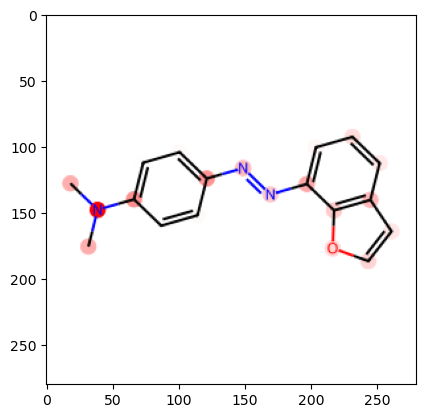

In [23]:
mol_index = 4
plot_grad_cam_explanation(gnn, test[mol_index], graph_test[mol_index])